## Differential corrector demo for LSST heliolinc3d output

Inputs:
- observations.csv contains the dfObs dataframe used in the HelioLinC3D_demo.ipynb notebook on the LSST github's heliolinc2 repo (https://github.com/lsst-dm/heliolinc2)
- clusters.csv contains the dedupe dataframe output by the HelioLinC3D_demo.ipynb notebook on the LSST github's heliolinc2 repo (https://github.com/lsst-dm/heliolinc2)

#### Create observation array for desired cluster

In [1]:
import pandas as pd
import numpy as np
np.set_printoptions(linewidth=np.inf)
import matplotlib.pyplot as plt

obsDF = pd.read_csv('inputs/observations.csv')
clstrDF = pd.read_csv('inputs/clusters.csv')

In [2]:
obsDF.head()

,Unnamed: 0,ObjID,FieldID,FieldMJD,AstRange(km),AstRangeRate(km/s),AstRA(deg),AstRARate(deg/day),AstDec(deg),AstDecRate(deg/day),...,SNR,AstrometricSigma(deg),MaginFilter,dmagDetect,AstRATrue(deg),AstDecTrue(deg),filter,class,obsName,obsId
0,0,S1005zBsa,322,59854.134964,3.903528e+08,18.438325,317.007162,-0.012928,-5.883793,-0.034805,...,15.131873,0.000012,20.706603,0.000562,317.007156,-5.883805,y,MBA,956799,0
1,1,S1004jwpa,323,59854.135412,3.213015e+08,17.699507,317.117346,-0.022249,-7.889578,-0.014036,...,21.476082,0.000009,20.411576,0.000289,317.117350,-7.889574,y,MBA,730551,1
2,2,S100d9mta,323,59854.135412,1.776728e+08,13.421910,317.269331,0.052952,-7.615268,0.072727,...,9.683597,0.000018,21.262543,0.003400,317.269335,-7.615288,y,MBA,2930217,2
3,3,S1008iFAa,323,59854.135412,3.466097e+08,15.576340,317.619736,-0.057787,-7.693811,-0.057932,...,14.401410,0.000012,20.672152,0.002806,317.619753,-7.693808,y,MBA,2971548,3
4,4,S10083vXa,323,59854.135412,2.432820e+08,15.256792,317.376144,0.034902,-7.314139,-0.091219,...,21.406557,0.000009,20.331998,0.004021,317.376134,-7.314126,y,MBA,2937313,4


In [3]:
clstrDF.head()

,Unnamed: 0,clusterId,obsId,trailId,r,drdt,cluster_epoch,x_ecl,y_ecl,z_ecl,vx_ecl,vy_ecl,vz_ecl,var_pos,var_vel,cluster_Id
0,0,3900,[ 2 59 693 1286 1656 1993 2363 27...,-1,2.2,-0.005,59862.067573,2.071965,-0.703196,0.227554,0.000146,0.016748,0.001647,1.245471e-07,3.132513e-09,0
1,1,3,[ 9 72 521 690 827 1362 1930 26...,-1,2.0,-0.006,59862.067573,1.915666,-0.547709,0.172322,-0.000847,0.018465,-0.002026,5.087235e-07,9.791802e-09,1
2,2,71043,[ 0 39 141 248 762 1140 1521 2340],-1,3.6,0.002,59862.067573,3.135354,-1.694481,0.510152,0.006237,0.007365,0.000792,1.513550e-07,2.514341e-09,2
3,3,26520,[ 1 70 2800 3465 5031 5101 5476 6787 7806],-1,2.8,0.004,59862.067573,2.528374,-1.164562,0.302156,0.007217,0.006441,0.001763,1.892683e-08,8.907136e-10,3
4,4,9936,[ 2 59 693 1286 1656 1993 2363],-1,2.4,-0.001,59862.067573,2.231005,-0.847060,0.260739,0.003962,0.013576,0.002578,1.304467e-07,2.067539e-09,4


Right now, each entry in the obsID column of clstr is a string, but it is supposed to be a list. So, let's convert...

In [4]:
for i, obsSet in enumerate(clstrDF['obsId']):
    obsSetRemovedChars = obsSet.replace('\n', '').replace('[', '').replace(']', '').split(' ')
    clstrDF.at[i, 'obsId'] = [int(obs) for obs in obsSetRemovedChars if obs]

In [5]:
clstrDF

,Unnamed: 0,clusterId,obsId,trailId,r,drdt,cluster_epoch,x_ecl,y_ecl,z_ecl,vx_ecl,vy_ecl,vz_ecl,var_pos,var_vel,cluster_Id
0,0,3900,"[2, 59, 693, 1286, 1656, 1993, 2363, 2713, 348...",-1,2.2,-0.005,59862.067573,2.071965,-0.703196,0.227554,0.000146,0.016748,0.001647,1.245471e-07,3.132513e-09,0
1,1,3,"[9, 72, 521, 690, 827, 1362, 1930, 2653, 3481,...",-1,2.0,-0.006,59862.067573,1.915666,-0.547709,0.172322,-0.000847,0.018465,-0.002026,5.087235e-07,9.791802e-09,1
2,2,71043,"[0, 39, 141, 248, 762, 1140, 1521, 2340]",-1,3.6,0.002,59862.067573,3.135354,-1.694481,0.510152,0.006237,0.007365,0.000792,1.513550e-07,2.514341e-09,2
3,3,26520,"[1, 70, 2800, 3465, 5031, 5101, 5476, 6787, 7806]",-1,2.8,0.004,59862.067573,2.528374,-1.164562,0.302156,0.007217,0.006441,0.001763,1.892683e-08,8.907136e-10,3
4,4,9936,"[2, 59, 693, 1286, 1656, 1993, 2363]",-1,2.4,-0.001,59862.067573,2.231005,-0.847060,0.260739,0.003962,0.013576,0.002578,1.304467e-07,2.067539e-09,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4413,4413,37798,"[7424, 7485, 8246, 8490]",-1,3.0,0.005,59862.067573,2.706400,-1.223302,0.423137,0.009633,0.008705,-0.001270,2.271974e-09,2.506872e-09,4413
4414,4414,881,"[7424, 7485, 8432, 8554]",-1,2.0,-0.004,59862.067573,1.916840,-0.531648,0.208194,-0.004114,0.009229,0.021660,2.163215e-07,2.366271e-07,4414
4415,4415,13100,"[7427, 7533, 8165, 8523]",-1,2.4,0.005,59862.067573,2.234599,-0.818272,0.311587,0.008343,0.009021,0.002082,2.977897e-09,3.209041e-09,4415
4416,4416,75954,"[7469, 8045, 8383, 8502]",-1,3.6,0.005,59862.067573,3.159592,-1.640791,0.533763,0.010073,0.007472,-0.003159,5.857349e-09,6.532479e-09,4416


In [6]:
clstrDF.head()

,Unnamed: 0,clusterId,obsId,trailId,r,drdt,cluster_epoch,x_ecl,y_ecl,z_ecl,vx_ecl,vy_ecl,vz_ecl,var_pos,var_vel,cluster_Id
0,0,3900,"[2, 59, 693, 1286, 1656, 1993, 2363, 2713, 348...",-1,2.2,-0.005,59862.067573,2.071965,-0.703196,0.227554,0.000146,0.016748,0.001647,1.245471e-07,3.132513e-09,0
1,1,3,"[9, 72, 521, 690, 827, 1362, 1930, 2653, 3481,...",-1,2.0,-0.006,59862.067573,1.915666,-0.547709,0.172322,-0.000847,0.018465,-0.002026,5.087235e-07,9.791802e-09,1
2,2,71043,"[0, 39, 141, 248, 762, 1140, 1521, 2340]",-1,3.6,0.002,59862.067573,3.135354,-1.694481,0.510152,0.006237,0.007365,0.000792,1.513550e-07,2.514341e-09,2
3,3,26520,"[1, 70, 2800, 3465, 5031, 5101, 5476, 6787, 7806]",-1,2.8,0.004,59862.067573,2.528374,-1.164562,0.302156,0.007217,0.006441,0.001763,1.892683e-08,8.907136e-10,3
4,4,9936,"[2, 59, 693, 1286, 1656, 1993, 2363]",-1,2.4,-0.001,59862.067573,2.231005,-0.847060,0.260739,0.003962,0.013576,0.002578,1.304467e-07,2.067539e-09,4


#### Select a cluster and run differential corrector to get orbit mean state and covariance

In [7]:
from modules.helper_funcs import au2km, day2sec, accumulate_observations_efficiently

In [8]:
clusterIdx = np.random.randint(0, len(clstrDF))
# clusterIdx = 1640 # 1901
data = clstrDF.iloc[clusterIdx]
fitTime = float(data['cluster_epoch']) # epoch for orbit determination
fitGuess = np.array([float(data['x_ecl']), float(data['y_ecl']), float(data['z_ecl']), float(data['vx_ecl']), float(data['vy_ecl']), float(data['vz_ecl'])]) # initial guess for orbit determination
print(data)

obsArray = np.zeros((len(data['obsId']), 5))
for i, obs in enumerate(data['obsId']):
    rawObsData = obsDF.loc[obsDF['obsId']==obs]
    time = float(rawObsData['FieldMJD'])
    ra = np.deg2rad(float(rawObsData['AstRA(deg)']))
    dec = np.deg2rad(float(rawObsData['AstDec(deg)']))
    raSigma = np.deg2rad(float(rawObsData['AstrometricSigma(deg)']))
    decSigma = np.deg2rad(float(rawObsData['AstrometricSigma(deg)']))
    raSigma = np.deg2rad(obsDF['AstrometricSigma(deg)'].std())
    decSigma = np.deg2rad(obsDF['AstrometricSigma(deg)'].std())
    obsArray[i,:] = (time, ra, dec, raSigma, decSigma)
print(obsArray)

Unnamed: 0                                        1440
clusterId                                        19799
obsId            [6844, 7824, 8143, 9336, 9811, 10976]
trailId                                             -1
r                                                  2.6
drdt                                             0.005
cluster_epoch                             59862.067573
x_ecl                                         2.398798
y_ecl                                        -0.963022
z_ecl                                         0.280419
vx_ecl                                        0.007919
vy_ecl                                        0.005754
vz_ecl                                       -0.001987
var_pos                                            0.0
var_vel                                            0.0
cluster_Id                                        1440
Name: 1440, dtype: object
[[ 5.98630128e+04  5.56501476e+00 -1.26200737e-01  1.43601528e-07  1.43601528e-07]
 [ 5.986302

In [9]:
np.ptp(obsArray[:,0])*24

49.418758517014794

[ 2.26176757 -0.85796497  0.25744464  0.00238711  0.01043691 -0.00262427]
[6913959.9347269  6011896.32900744 1354539.52366733]
9261777.192899799
[5.73418322e+05 3.07058114e+02 9.01008280e-06]
573418.4046580178
[1.87289963 1.63193483 0.45013004]
2.5245952887732135
[1.02620360e-10 3.25989515e-12 3.31547070e-12]
1.0272564226175821e-10
[[ 2.13600809e-03 -1.85732334e-03  4.18473032e-04 -6.47362331e-06  7.32566243e-06 -7.84015614e-06]
 [-1.85732334e-03  1.61499857e-03 -3.63874924e-04  5.62622260e-06 -6.36746924e-06  6.81673978e-06]
 [ 4.18473032e-04 -3.63874924e-04  8.19846486e-05 -1.25804339e-06  1.42633762e-06 -1.53411478e-06]
 [-6.47361507e-06  5.62621544e-06 -1.25804177e-06  1.17005336e-06 -1.01873586e-06  2.35058085e-07]
 [ 7.32565530e-06 -6.36746304e-06  1.42633623e-06 -1.01873587e-06  8.88346276e-07 -2.09919144e-07]
 [-7.84015462e-06  6.81673847e-06 -1.53411448e-06  2.35058110e-07 -2.09919165e-07  6.75853637e-08]]


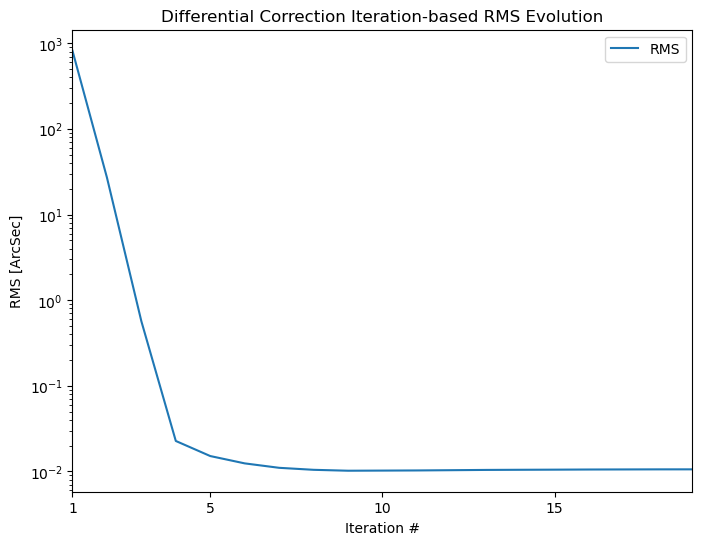

In [10]:
epoch = fitTime
x_nom = fitGuess.copy()
obs_array = obsArray.copy()

max_iter = 20
fd_pert = 1e-6
rms_change_limit = 1e-3
min_iter = 5

rms_rad = np.zeros((max_iter,1))
rms = np.zeros((max_iter,1))
del_rms = np.inf*np.ones((max_iter,1))
state_arr = np.zeros((len(x_nom), max_iter))
i = 0
while (abs(del_rms[i-1])>rms_change_limit or i<min_iter):
    P, a, w, b = accumulate_observations_efficiently(epoch, x_nom, obs_array, fd_pert)
    delta_x = P@(a.T @ w @ b)
    x_nom += delta_x.T[0]
    state_arr[:,i] = x_nom.T
    rms_rad[i] = np.sqrt(np.sum(b.T @ b)/(2*len(obs_array[:,0])))
    rms[i] = np.rad2deg(rms_rad[i])*3600 # convert to ArcSec
    if i > 0: del_rms[i] = (rms[i] - rms[i-1])/rms[i-1]
    i += 1
    if i >= max_iter: break
# end for
n_iter = i
r_epoch = x_nom[:3] # differentially corrected position at epoch
v_epoch = x_nom[3:6] # differentially corrected velocity at epoch
variance = np.diag(P) # calculate the variance of the nominal state elements
st_dev = np.sqrt(variance) # calculate the standard deviation of the nominal state elements
[values,vectors] = np.linalg.eig(P) # calculate eigenvalues and eigenvectors of covariance matrix for error ellipsoid

print(x_nom)
print(st_dev[:3]*au2km)
print(np.linalg.norm(st_dev[:3]*au2km))
print(values[:3]*au2km)
print(np.linalg.norm(values[:3]*au2km))
print(st_dev[3:6]*au2km/day2sec)
print(np.linalg.norm(st_dev[3:6]*au2km/day2sec))
print(values[3:6]*au2km/day2sec)
print(np.linalg.norm(values[3:6]*au2km/day2sec))
print(P)

plt.figure(figsize=(8,6), dpi=100)
plt.semilogy(np.arange(1,n_iter+1), rms[:n_iter], label = 'RMS')
plt.xlabel('Iteration #')
plt.xticks(np.arange(1,n_iter+1,1)) if n_iter <= 10 else plt.xticks(np.hstack((1,np.arange(5,n_iter+1,5))))
plt.xlim(1, n_iter)
plt.ylabel('RMS [ArcSec]')
plt.title('Differential Correction Iteration-based RMS Evolution')
plt.legend()
plt.show()

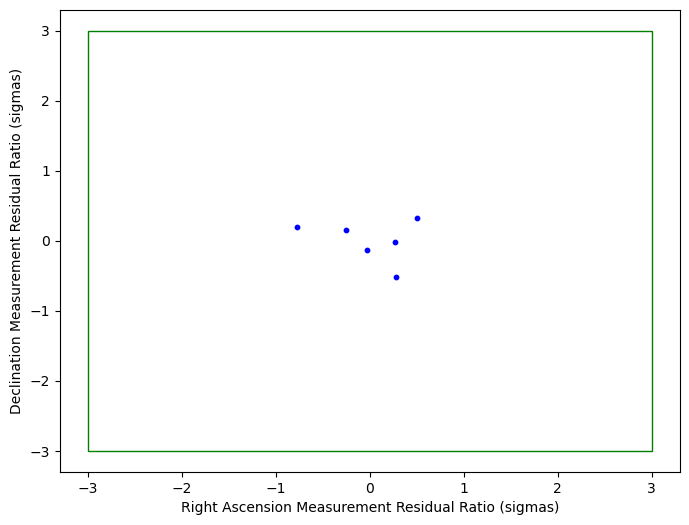

In [11]:
plt.figure(figsize=(8,6), dpi=100)
uncertainty_box = plt.Rectangle((-3,-3), 2*3, 2*3, fc='None', ec='green')
plt.gca().add_patch(uncertainty_box)
plt.scatter(b[::2].ravel() / obsArray[:,3], b[1::2].ravel() / obsArray[:,4], s=10, c='blue')
plt.xlabel('Right Ascension Measurement Residual Ratio (sigmas)')
plt.ylabel('Declination Measurement Residual Ratio (sigmas)')
plt.show()